In [2]:
#Importando Librerias

from minisom import MiniSom
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

In [8]:
path_file_benigno = "Datasets/Data_Benigno.csv"
path_file_ransomware = "Datasets/Data_Ransomware.csv"

dataBe = pd.read_csv(path_file_benigno)
dataRan = pd.read_csv(path_file_ransomware)


c_benigno = dataBe.shape[0]
c_Ransomware = dataRan.shape[0]

cantidadFinal = c_Ransomware if (c_benigno > c_Ransomware) else c_benigno

data_Be_balanced = dataBe.head(cantidadFinal)
data_Ra_balanced = dataRan.head(cantidadFinal)

dataF = pd.concat([data_Be_balanced, data_Ra_balanced], axis=0)
print("Cantidad Benigno: ", c_benigno)
print("Cantidad Ransomware: ", c_Ransomware)
print("Cantidad Final Dataset: ", cantidadFinal)
dataF

Cantidad Benigno:  137907
Cantidad Ransomware:  74888
Cantidad Final Dataset:  74888


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07,Benigno,1,1,0
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06,Benigno,1,1,0
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06,Benigno,1,1,0
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00,Benigno,1,1,0
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07,Benigno,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74883,1925248,55237504,46,54,8572,12611,52.0,75,405,75.0,405.0,0.000000,0.000000,0.398660,6.901801e+01,Ransomware,0,0,1
74884,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05,Ransomware,0,0,1
74885,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,Ransomware,0,0,1
74886,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00,Ransomware,0,0,1


In [9]:
dataF.drop(axis=1,inplace=True,columns=['Label'])
dataF

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel,benignoLabel,ransomwareLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07,1,1,0
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06,1,1,0
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06,1,1,0
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00,1,1,0
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74883,1925248,55237504,46,54,8572,12611,52.0,75,405,75.0,405.0,0.000000,0.000000,0.398660,6.901801e+01,0,0,1
74884,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05,0,0,1
74885,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,0,0,1
74886,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00,0,0,1


In [11]:
dataF.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel,benignoLabel,ransomwareLabel
count,1.497760e+05,1.497760e+05,149776.000000,1.497760e+05,1.497760e+05,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,1.497760e+05,1.497760e+05,149776.000000,149776.000000,149776.000000
mean,3.155877e+07,2.778276e+04,7.839981,1.306556e+03,1.209905e+04,199.951508,49.994492,235.628752,246.501088,107.538422,136.193752,77.350531,87.568348,4.523757e+04,2.349517e+06,0.500000,0.500000,0.500000
std,2.056215e+08,1.995322e+06,205.178595,3.191709e+04,2.995728e+05,405.653757,87.134555,333.295591,421.729064,117.907072,233.270876,144.871525,181.026950,1.973894e+05,1.051974e+07,0.500002,0.500002,0.500002
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.928000e+03,2.000000e+00,1.000000,1.040000e+02,5.200000e+01,52.000000,-1.000000,52.000000,-1.000000,52.000000,0.000000,0.000000,0.000000,1.483442e-01,1.674836e+01,0.000000,0.000000,0.000000
50%,1.142135e+05,4.000000e+00,2.000000,5.190000e+02,1.160000e+03,52.000000,52.000000,59.000000,52.000000,54.666667,52.000000,1.000000,0.000000,4.728948e+00,5.893092e+02,0.500000,0.500000,0.500000
75%,7.696119e+06,1.300000e+01,6.000000,1.877000e+03,1.271100e+04,348.000000,52.000000,331.000000,271.000000,114.000000,143.000000,82.805742,41.286196,8.620674e+01,1.286254e+04,1.000000,1.000000,1.000000
max,1.154108e+10,2.630639e+08,53758.000000,1.220839e+07,7.463559e+07,126552.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,954.593631,946.108345,2.000000e+06,4.920000e+08,1.000000,1.000000,1.000000


In [12]:
dataF.corr()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel,benignoLabel,ransomwareLabel
Flow Duration,1.000000,-0.001185,0.005047,0.006235,0.004733,0.017303,-0.048716,0.014740,0.017281,0.002057,0.000949,0.012503,0.025309,-0.010205,-0.011100,-0.040296,-0.040296,0.040296
Tot Fwd Pkts,-0.001185,1.000000,0.000024,-0.000550,-0.000450,0.082193,0.002211,-0.001670,-0.000605,0.000993,-0.001291,-0.002986,0.000919,-0.003145,-0.003043,-0.013915,-0.013915,0.013915
Tot Bwd Pkts,0.005047,0.000024,1.000000,0.181868,0.933084,-0.005663,0.001758,0.025415,0.058240,0.001064,0.097706,0.003656,0.017621,-0.006059,-0.004864,0.015127,0.015127,-0.015127
TotLen Fwd Pkts,0.006235,-0.000550,0.181868,1.000000,0.125847,0.004049,0.000840,0.028433,0.021052,0.042283,0.022306,0.015587,0.012151,-0.003664,-0.003582,-0.008343,-0.008343,0.008343
TotLen Bwd Pkts,0.004733,-0.000450,0.933084,0.125847,1.000000,0.001045,0.000272,0.017195,0.046310,-0.002742,0.084804,-0.001338,0.008775,-0.003922,-0.002735,-0.001364,-0.001364,0.001364
Fwd Pkt Len Min,0.017303,0.082193,-0.005663,0.004049,0.001045,1.000000,-0.004004,0.011639,-0.013135,0.030905,-0.008910,0.007467,-0.012175,-0.009117,-0.010628,-0.372610,-0.372610,0.372610
Bwd Pkt Len Min,-0.048716,0.002211,0.001758,0.000840,0.000272,-0.004004,1.000000,0.028629,0.210841,0.023730,0.370037,0.029667,0.015665,-0.065021,-0.063418,-0.004203,-0.004203,0.004203
Fwd Pkt Len Max,0.014740,-0.001670,0.025415,0.028433,0.017195,0.011639,0.028629,1.000000,0.601429,0.818144,0.460535,0.945626,0.614161,-0.062270,-0.059850,-0.026023,-0.026023,0.026023
Bwd Pkt Len Max,0.017281,-0.000605,0.058240,0.021052,0.046310,-0.013135,0.210841,0.601429,1.000000,0.334957,0.885522,0.522293,0.942996,-0.073499,-0.070990,0.039626,0.039626,-0.039626
Fwd Pkt Len Mean,0.002057,0.000993,0.001064,0.042283,-0.002742,0.030905,0.023730,0.818144,0.334957,1.000000,0.220803,0.770166,0.368023,-0.051598,-0.049412,-0.074714,-0.074714,0.074714


In [16]:
dataX = dataF.drop(['binaryLabel','benignoLabel','ransomwareLabel'], axis=1).copy()
dataY3 = dataF[['binaryLabel','benignoLabel','ransomwareLabel']].copy()
dataY = dataF[['binaryLabel']].copy()

dataXVal = dataX.values
dataY3Val = dataY3.values
dataYVal = dataY.values

#Veamos las shape.

In [24]:
#Iniciando Red.

som_shape = (1,2)
som = MiniSom(som_shape[0], som_shape[1], dataX.shape[1], sigma=.12, learning_rate=.9)
som.train_batch(dataXVal, 500,verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 


 quantization error: 36428626.482648864


## Graficos de prediccion

Cantidad de muestras:  149776
Cantidad de Cluster 0 (Beningno):  2250
Cantidad de Cluster 1 (Ransomware):  147526


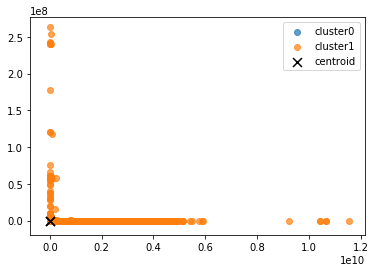

In [29]:
winner_coordinates = np.array([som.winner(x) for x in dataXVal]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

import matplotlib.pyplot as plt
%matplotlib inline

#Dibujando los clusters con 2 dimensiones o.o

for c in np.unique(cluster_index):
    plt.scatter(dataXVal[cluster_index == c, 0],
                dataXVal[cluster_index == c, 1],
                label = 'cluster'+str(c), alpha=.7)

#Dibujo de centroides XD

for centroid in som.get_weights():
    plt.scatter(centroid[:,0], centroid[:, 1], marker='x', s=80, linewidths=35, color='k', label='centroid')

c_r, c_b = 0,0
for x in cluster_index:
    if( x == 1):
        c_r += 1
    else:
        c_b += 1

print("Cantidad de muestras: ",len(cluster_index))
print("Cantidad de Cluster 0 (Beningno): ", c_b)
print("Cantidad de Cluster 1 (Ransomware): ", c_r)
plt.legend();